In [66]:
using PrivateMultiplicativeWeights
using Distributions
using PyPlot
using Random
# include("./marginals.jl")
include("../examples/marginals.jl")

Iter.	 Mean sq err	 time (sec)
0	 0.002		 0.018
itr: 1	 mean_error: 0.002		 0.077
itr: 1	 max_error: 0.508		 0.077
itr: 2	 mean_error: 0.001		 0.170
itr: 2	 max_error: 0.494		 0.170
itr: 3	 mean_error: 0.001		 0.224
itr: 3	 max_error: 0.609		 0.224
itr: 4	 mean_error: 0.001		 0.289
itr: 4	 max_error: 0.112		 0.289
itr: 5	 mean_error: 0.001		 0.334
itr: 5	 max_error: 0.102		 0.334
itr: 6	 mean_error: 0.001		 0.390
itr: 6	 max_error: 0.098		 0.390
itr: 7	 mean_error: 0.001		 0.450
itr: 7	 max_error: 0.098		 0.450
itr: 8	 mean_error: 0.001		 0.524
itr: 8	 max_error: 0.098		 0.524
itr: 9	 mean_error: 0.001		 0.576
itr: 9	 max_error: 0.094		 0.576
itr: 10	 mean_error: 0.001		 0.655
itr: 10	 max_error: 0.094		 0.655


PrivateMultiplicativeWeights.MWState(Histogram([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1000), Histogram([1.528503385274321e-6, 1.528503385274321e-6, 1.579689099902819e-6, 1.579689099902819e-6, 1.8691820278258592e-6, 1.8691820278258592e-6, 1.931776209027386e-6, 1.931776209027386e-6, 1.528503385274321e-6, 1.528503385274321e-6  …  2.2052957820988827e-6, 2.2052957820988827e-6, 1.7449236887364248e-6, 1.7449236887364248e-6, 1.8033567722615444e-6, 1.8033567722615444e-6, 2.1338389108823404e-6, 2.1338389108823404e-6, 2.2052957820988827e-6, 2.2052957820988827e-6], 0), Parities(20, 3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  786689, 786945, 787457, 788481, 790529, 794625, 802817, 819201, 851969, 917505]), [1.0, -0.001999999999999999, -0.020000000000000004, 0.03799999999999999, -0.018000000000000002, 0.032, 0.046, 0.028000000000000004, 0.027999999999999997, 0.03  …  -0.052000000000000005, 0.042, -0.036000000000000004, -0.046, 0.00400000000

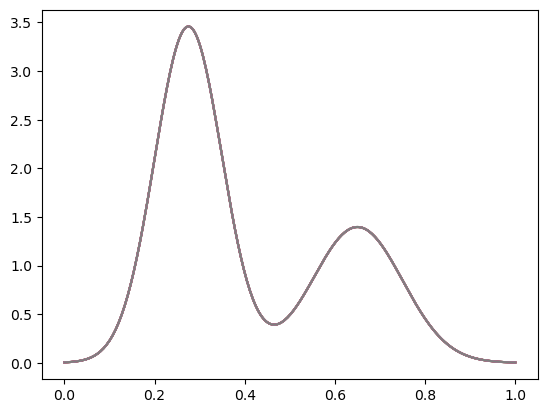

In [48]:
d_continuous = Truncated(MixtureModel(Normal, [(.275, .075), (.65, .1)], [0.65, 0.35]), 0, 1)
xs = range(d_continuous.lower, stop = d_continuous.upper, length = 300)
ys = pdf(d_continuous, xs)
#xs = [1, 2, 3]
#ys = [1, 2, 3]
p = plot(xs, ys)
display(gcf())

In [63]:
mw = marginals()
print(typeof(mw[2]))

Iter.	 Mean sq err	 time (sec)
0	 0.002		 0.020
itr: 1	 mean_error: 0.002		 0.214
itr: 1	 max_error: 0.508		 0.214
itr: 2	 mean_error: 0.001		 0.147
itr: 2	 max_error: 0.508		 0.147
itr: 3	 mean_error: 0.001		 0.232
itr: 3	 max_error: 0.605		 0.232
itr: 4	 mean_error: 0.001		 0.268
itr: 4	 max_error: 0.100		 0.268
itr: 5	 mean_error: 0.001		 0.340
itr: 5	 max_error: 0.092		 0.340
itr: 6	 mean_error: 0.001		 0.392
itr: 6	 max_error: 0.092		 0.392
itr: 7	 mean_error: 0.001		 0.457
itr: 7	 max_error: 0.092		 0.457
itr: 8	 mean_error: 0.001		 0.518
itr: 8	 max_error: 0.092		 0.518
itr: 9	 mean_error: 0.001		 0.579
itr: 9	 max_error: 0.092		 0.579
itr: 10	 mean_error: 0.001		 0.650
itr: 10	 max_error: 0.092		 0.650


MethodError: MethodError: no method matching getindex(::PrivateMultiplicativeWeights.MWState, ::Int64)

Obtaining a private approximation is as easy as running the following command.

In [70]:
function marginals(d=20, order=3, n=1000)
    data_matrix = rand(0:1, d, n)
    data_matrix[3, :] = data_matrix[1, :] .* data_matrix[2, :]
    mw = mwem(Parities(d, order), Tabular(data_matrix), MWParameters(epsilon = 1, verbose=true))
    print("times: ", typeof(mw[2][1]), mw[2][1])
    return mw
end
mw = marginals()

Iter.	 Mean sq err	 time (sec)
0	 0.002		 0.088
itr: 1	 mean_error: 0.002		 0.091
itr: 1	 max_error: 0.508		 0.091
itr: 2	 mean_error: 0.001		 0.152
itr: 2	 max_error: 0.502		 0.152
itr: 3	 mean_error: 0.001		 0.216
itr: 3	 max_error: 0.588		 0.216
itr: 4	 mean_error: 0.001		 0.273
itr: 4	 max_error: 0.114		 0.273
itr: 5	 mean_error: 0.001		 0.361
itr: 5	 max_error: 0.114		 0.361
itr: 6	 mean_error: 0.001		 0.409
itr: 6	 max_error: 0.102		 0.409
itr: 7	 mean_error: 0.001		 0.451
itr: 7	 max_error: 0.102		 0.451
itr: 8	 mean_error: 0.001		 0.511
itr: 8	 max_error: 0.098		 0.511
itr: 9	 mean_error: 0.001		 0.572
itr: 9	 max_error: 0.094		 0.572
itr: 10	 mean_error: 0.001		 0.642
itr: 10	 max_error: 0.094		 0.642


MethodError: MethodError: no method matching getindex(::PrivateMultiplicativeWeights.MWState, ::Int64)

In [59]:
num_samples = 1000
domain_size = 100
samples = rand(d_continuous, num_samples)

function histogram_from_sample(samples, num_bins)
    @assert 0 <= minimum(samples)
    @assert maximum(samples) <= 1
    h = zeros(num_bins)
    for x in round(Int64, samples*num_bins, RoundNearest)
        h[x] += 1
    end
    collect(1:num_bins)/num_bins, h
end

xs, ys = histogram_from_sample(samples, domain_size)
bar(xs, ys, width=1/domain_size);

MethodError: MethodError: no method matching round(::Type{Int64}, ::Vector{Float64}, ::RoundingMode{:Nearest})

Closest candidates are:
  round(::Type{T}, !Matched::BigFloat, ::RoundingMode) where T<:Union{Signed, Unsigned}
   @ Base mpfr.jl:351
  round(::Type{<:Integer}, !Matched::BigFloat, ::RoundingMode)
   @ Base mpfr.jl:355
  round(::Type{T}, !Matched::BigFloat, ::Union{Base.MPFR.MPFRRoundingMode, RoundingMode}) where T<:Union{Signed, Unsigned}
   @ Base mpfr.jl:335
  ...


In [60]:
num_samples = 1000
domain_size = 100
samples = rand(d_continuous, num_samples)
mw = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

AssertionError: AssertionError: queries.domain == length(h.weights)

Above we ran `mwem` with the default parameters corresponding to `10` iterations and `epsilon=1.0` per iteration. We can adjust these parameters as follows:

In [ ]:
mw = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples), MWParameters(epsilon=0.1, iterations=8));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

### Side-by-side comparison

In [ ]:
bar(xs, ys, 1/domain_size);
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

In [ ]:
mw = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

In [ ]:
mw, mean_errors, max_errors, times = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples), MWParameters(epsilon=0.1, iterations=8));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);